In [1]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [5]:
# Load our dataset
# Note it should be in same dir


maindf=pd.read_csv('/content/BTC-USD.csv')

In [6]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1827
Total number of fields present in the dataset:  8


In [7]:

maindf.shape

(1827, 8)

In [8]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,fng
0,28-07-2018,8169.060059,8222.849609,8110.770020,8192.150391,8192.150391,3.988750e+09,54
1,29-07-2018,8205.820313,8272.259766,8141.180176,8218.459961,8218.459961,4.107190e+09,54
2,30-07-2018,8221.580078,8235.500000,7917.500000,8180.479980,8180.479980,5.551400e+09,53
3,31-07-2018,8181.200195,8181.529785,7696.930176,7780.439941,7780.439941,5.287530e+09,48
4,01-08-2018,7769.040039,7769.040039,7504.950195,7624.910156,7624.910156,4.797620e+09,39


In [9]:

maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,fng
1822,24-07-2023,30081.66211,30093.39453,28934.29492,29176.91602,29176.91602,1.539582e+10,55
1823,25-07-2023,29178.97070,29353.16016,29062.43359,29227.39063,29227.39063,1.026677e+10,50
1824,26-07-2023,29225.75977,29675.55273,29113.91211,29354.97266,29354.97266,1.349755e+10,51
1825,27-07-2023,29353.79883,29560.96680,29099.35156,29210.68945,29210.68945,1.077078e+10,51
1826,28-07-2023,29211.60156,29282.05859,29126.58008,29206.90625,29206.90625,1.110350e+10,52


In [10]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   float64
 7   fng        1827 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 114.3+ KB


In [11]:

maindf.describe()

,Open,High,Low,Close,Adj Close,Volume,fng
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03,1827.000000
mean,22292.320923,22814.402963,21722.305298,22301.672530,22301.672530,2.801135e+10,43.926108
std,16567.934841,16998.895708,16066.485621,16561.002087,16561.002087,1.899577e+10,22.145108
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,3.064030e+09,5.000000
25%,8556.367676,8701.088379,8304.779785,8563.235352,8563.235352,1.604452e+10,25.000000
50%,18051.320310,18553.298830,17603.544920,18058.904300,18058.904300,2.537137e+10,41.000000
75%,33767.375000,34778.076175,32265.797850,33734.515625,33734.515625,3.613765e+10,60.000000
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11,95.000000


##Checking for Null Values

In [12]:

print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [13]:

print('NA values:',maindf.isnull().values.any())

NA values: False


In [14]:
# Final shape of the dataset after dealing with null values

maindf.shape

(1827, 8)

##EDA(Exploratory Data Analysis)

In [15]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 28-07-2018
Ending Date 28-07-2023


##Analysis of Year 2022

In [16]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%d-%m-%Y')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2022-12-31')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,fng
1253,2022-01-01,46311.74609,47827.31250,46288.48438,47686.81250,21
1254,2022-01-02,47680.92578,47881.40625,46856.93750,47345.21875,29
1255,2022-01-03,47343.54297,47510.72656,45835.96484,46458.11719,29
1256,2022-01-04,46458.85156,47406.54688,45752.46484,45897.57422,23
1257,2022-01-05,45899.35938,46929.04688,42798.22266,43569.00391,24
...,...,...,...,...,...,...
1612,2022-12-26,16842.25000,16920.12305,16812.36914,16919.80469,28
1613,2022-12-27,16919.29102,16959.84570,16642.07227,16717.17383,27
1614,2022-12-28,16716.40039,16768.16992,16497.55664,16552.57227,28
1615,2022-12-29,16552.32227,16651.75586,16508.68359,16642.34180,28


In [17]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close','fng']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close,fng
Date,,,
January,41368.073463,41114.422380,20.838710
February,40591.103934,40763.474053,34.571429
March,41889.148438,41966.237526,34.000000
April,41694.653646,41435.319662,31.266667
May,31900.711128,31706.105218,14.806452
June,24783.338477,24383.685483,11.266667
July,21424.733053,21539.253843,24.161290
August,22471.866558,22366.266318,32.645161
September,19821.353711,19804.779231,23.166667


In [18]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [19]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price for 2022')
fig.show()

In [20]:
names = cycle(['Open Price','Close Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[
                                          y_2022['Open'], y_2022['Close']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='BTC analysis chart', font_size=15, font_color='black',legend_title_text='BTC Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

#Overall Analysis from 2018-2023

In [21]:
y_overall = maindf
y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,fng
0,2018-07-28,8169.060059,8222.849609,8110.770020,8192.150391,54
1,2018-07-29,8205.820313,8272.259766,8141.180176,8218.459961,54
2,2018-07-30,8221.580078,8235.500000,7917.500000,8180.479980,53
3,2018-07-31,8181.200195,8181.529785,7696.930176,7780.439941,48
4,2018-08-01,7769.040039,7769.040039,7504.950195,7624.910156,39
...,...,...,...,...,...,...
1822,2023-07-24,30081.662110,30093.394530,28934.294920,29176.916020,55
1823,2023-07-25,29178.970700,29353.160160,29062.433590,29227.390630,50
1824,2023-07-26,29225.759770,29675.552730,29113.912110,29354.972660,51
1825,2023-07-27,29353.798830,29560.966800,29099.351560,29210.689450,51


In [22]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close','fng']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close,fng
Date,,,
January,21618.710106,21643.523052,44.309677
February,24518.550581,24636.305595,53.602837
March,26458.082887,26585.646466,45.696774
April,28011.435254,27980.512204,46.886667
May,24602.446469,24444.308982,43.541935
June,21439.017901,21379.433200,39.866667
July,20704.199598,20767.473013,40.621795
August,19401.726037,19414.212299,47.845161
September,18606.775280,18565.914095,35.313333


In [23]:
names = cycle(['Close Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[
                                          y_overall['Close']],
             labels={'Date': 'Date','value':'price (USD)'})
fig.update_layout(title_text='BTC chart', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [24]:
names = cycle(['fng'])

fig = px.line(y_overall, x=y_overall.Date, y=[
                                          y_overall['fng']],
             labels={'Date': 'Date','value':'value'})
fig.update_layout(title_text='Fear and Greed Index', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Building LSTM Model

In [25]:
closedf = maindf[['Date','Close','fng']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1827, 3)


In [60]:
close_stock=maindf[['Date','Close','fng']]
close=close_stock[0:1827:]

In [27]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2019-2023', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [28]:
fig = px.line(closedf, x=closedf.Date, y=closedf.fng,labels={'date':'Date','close':'Index'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Fear And Greed Index 2019-2023', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [29]:
del closedf['Date']




*   Normalizing Data

*   Normalization is a technique often applied as part of data preparation for machine learning.The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
*  MinMaxScaler

*  For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.



In [30]:
scaler=MinMaxScaler(feature_range=(0,2))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,2))
print(closedf.shape)

(1827, 2)


In [31]:
closedf


array([[0.15406136, 1.08888889],
       [0.15487931, 1.08888889],
       [0.15369853, 1.06666667],
       ...,
       [0.81200634, 1.02222222],
       [0.80752063, 1.02222222],
       [0.80740301, 1.04444444]])


##Slicing data into Training set and Testing set



In [32]:
# we keep the training set as 80% and 20% testing set

training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1461, 2)
test_data:  (366, 2)


###Now we Transform the Close price based on Time-series-analysis forecasting requirement ,
### Here we will take 15

In [33]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1445, 15)
y_train:  (1445,)
X_test:  (350, 15)
y_test (350,)


#Actual Model Building

In [35]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [36]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
46/46 [==============================] - 2s 15ms/step - loss: 0.2122 - val_loss: 0.0526
Epoch 2/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0251 - val_loss: 0.0244
Epoch 3/200
46/46 [==============================] - 1s 14ms/step - loss: 0.0148 - val_loss: 0.0101
Epoch 4/200
46/46 [==============================] - 1s 14ms/step - loss: 0.0101 - val_loss: 0.0057
Epoch 5/200
46/46 [==============================] - 1s 16ms/step - loss: 0.0079 - val_loss: 0.0059
Epoch 6/200
46/46 [==============================] - 1s 13ms/step - loss: 0.0066 - val_loss: 0.0046
Epoch 7/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 8/200
46/46 [==============================] - 0s 9ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 9/200
46/46 [==============================] - 0s 9ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 10/200
46/46 [==============================] - 0s 9ms/step - loss: 0.0052 - val_loss: 0.0032
Ep

##Plotting Loss vs Validation loss

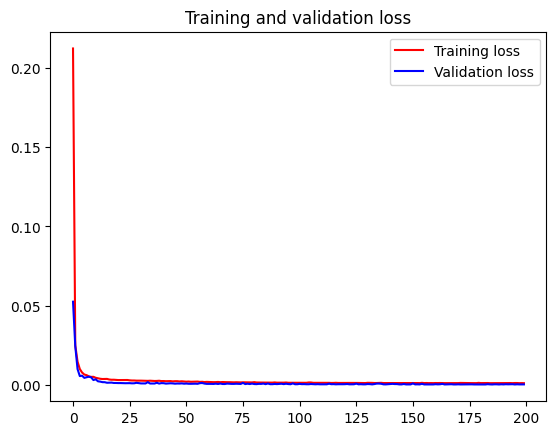

<Figure size 640x480 with 0 Axes>

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

11/11 [==============================] - 0s 5ms/step


((1445, 1), (350, 1))

#Model Evaluation

In [39]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))

Train data RMSE:  0.03465924740222694
Train data MSE:  0.0012012634304887752
Train data MAE:  0.020182841964964303
-------------------------------------------------------------------------------------
Test data RMSE:  0.02106909123244485
Test data MSE:  0.0004439066053610844
Test data MAE:  0.015148374445655569


##Variance Regression Score

In [40]:
print("Train data explained variance regression score:",
      explained_variance_score(y_train, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(y_test, test_predict))

Train data explained variance regression score: 0.9963460923618133
Test data explained variance regression score: 0.9818196631894367


#R square score for regression

In [41]:
print("Train data R2 score:", r2_score(y_train, train_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Train data R2 score: 0.9963306182746233
Test data R2 score: 0.978882855145477


In [64]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)



Train predicted data:  (1827, 2)
Test predicted data:  (1827, 2)


##Plotting entire Closing Stock Price with next 30 days period of prediction

In [48]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()